<a href="https://colab.research.google.com/github/Zexsteel900/StockPricePrediction/blob/main/LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [ ]:
df = pdr.get_data_yahoo('INFY', start='2019-01-01', end=datetime.now())
# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,9.500000,9.730000,9.470000,9.610000,8.491577,9818900
2019-01-03,9.550000,9.590000,9.470000,9.470000,8.367873,9404900
2019-01-04,9.520000,9.720000,9.500000,9.630000,8.509251,7119000
2019-01-07,9.700000,9.810000,9.660000,9.710000,8.579941,7732700
2019-01-08,9.820000,9.850000,9.720000,9.750000,8.615285,9391600
...,...,...,...,...,...,...
2023-11-09,16.540001,16.580000,16.340000,16.360001,16.360001,7329500
2023-11-10,16.400000,16.680000,16.379999,16.629999,16.629999,5099500
2023-11-13,16.450001,16.610001,16.420000,16.549999,16.549999,4579800


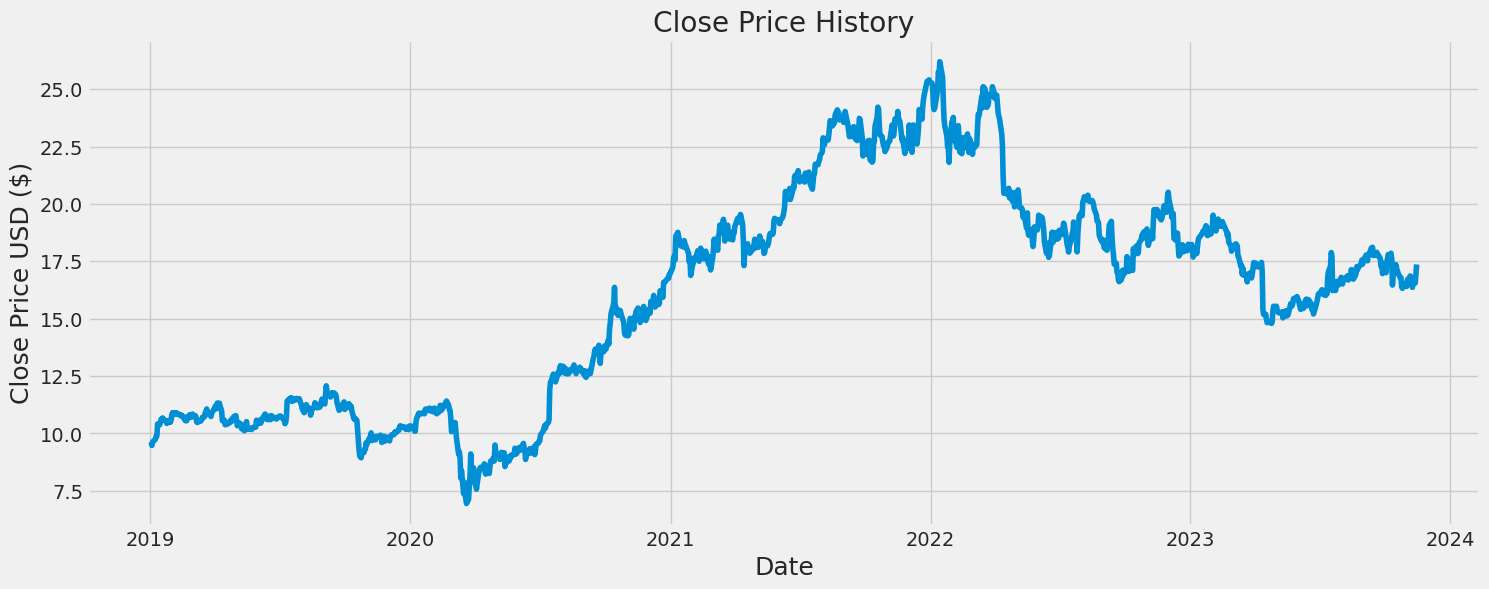

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1167

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.13862926],
       [0.13136034],
       [0.1396677 ],
       ...,
       [0.49896152],
       [0.51817236],
       [0.54101766]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.13862926, 0.13136034, 0.1396677 , 0.14382139, 0.14589823,
       0.15212875, 0.15264797, 0.18016613, 0.17808929, 0.18431981,
       0.19055034, 0.18899272, 0.19366562, 0.18639665, 0.18639665,
       0.18120458, 0.1874351 , 0.18587748, 0.18380059, 0.18951194,
       0.20041537, 0.20560745, 0.20404983, 0.20249221, 0.20560745,
       0.20301143, 0.20353061, 0.20145376, 0.19885775, 0.20041537,
       0.19833853, 0.19833853, 0.1874351 , 0.19522324, 0.1874351 ,
       0.19158878, 0.20093459, 0.19678086, 0.19522324, 0.19626169,
       0.20249221, 0.19626169, 0.19885775, 0.19574246, 0.18431981,
       0.18328142, 0.1874351 , 0.18587748, 0.1874351 , 0.19003116,
       0.19522324, 0.19626169, 0.20560745, 0.20768429, 0.21391486,
       0.20456905, 0.20145376, 0.20145376, 0.19678086, 0.20456905])]
[0.20716511431749568]

[array([0.13862926, 0.13136034, 0.1396677 , 0.14382139, 0.14589823,
       0.15212875, 0.15264797, 0.18016613, 0.17808929, 0.18431981,
       0.19055034, 0.18899272, 0.19

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
1107/1107 [==============================] - 77s 59ms/step - loss: 0.0029
Epoch 2/3
1107/1107 [==============================] - 59s 53ms/step - loss: 0.0012
Epoch 3/3
1107/1107 [==============================] - 57s 51ms/step - loss: 8.8063e-04


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 40ms/step


0.2891632510898406

<ipython-input-9-0cdd5e68a3a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


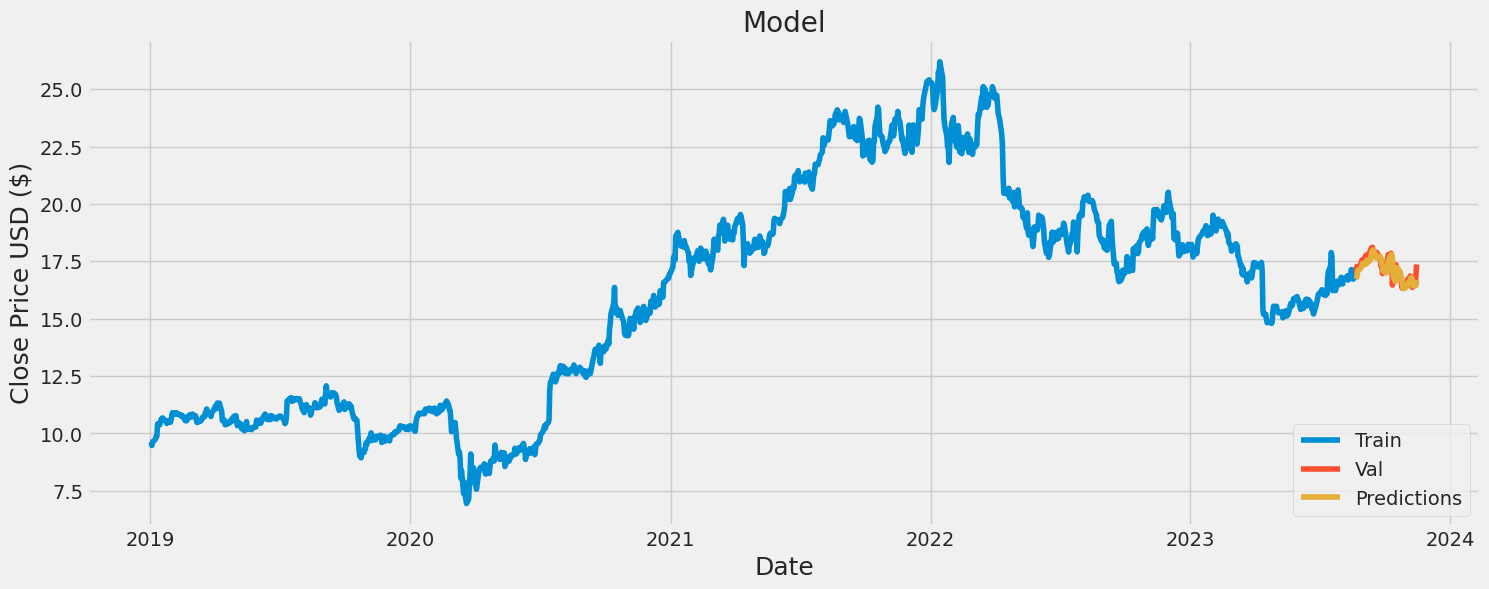

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid


,Close,Predictions
Date,,
2023-08-22,16.990000,16.721115
2023-08-23,17.270000,16.806541
2023-08-24,17.129999,17.046961
2023-08-25,17.250000,17.111006
2023-08-28,17.330000,17.169878
...,...,...
2023-11-09,16.360001,16.682880
2023-11-10,16.629999,16.422884
2023-11-13,16.549999,16.426029
